    # Energy Dataset.

## 1. Importing the required libraries for EDA

Below are the libraries that are used IN THE MODEL

In [65]:
import pandas as pd                                                           #Dataframe
import numpy as np                                                            #Dataframe
import matplotlib.pyplot as plt                                               #Visualisation
import plotly.express as px                                                   #Visualization
import seaborn as sns                                                         #Visualization
from sklearn.model_selection import train_test_split, GridSearchCV            #Model
from sklearn.preprocessing import StandardScaler                              #Model
from sklearn.metrics import mean_squared_error, r2_score                      #Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Model
from sklearn.linear_model import LinearRegression                             #Model
from sklearn import preprocessing                                             #Model
import statsmodels.api as sm                                                  #Model
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the data into the data frame.

In [66]:
df = pd.read_csv("ENERGY_data.csv")
energy_data = df
# To display the top 42 rows
energy_data.head(45)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,"6,52,230",33.939110,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,"6,52,230",33.939110,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,"6,52,230",33.939110,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,"6,52,230",33.939110,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,"6,52,230",33.939110,67.709953


In [67]:
#Checking null values and types of the parameters
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [68]:
#Checking descriptive analytics of the numerical parameters
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


## 4. Renaming columns and dropping columns

In [69]:
#Adding "_" lower case to headers to easy hanlde
energy_data.columns = energy_data.columns.str.lower().str.replace(" ", "_")

In [70]:
#Renaming headers to easu handle titles
energy_data = energy_data.rename({'entity':'country','access_to_electricity_(%_of_population)':'access_electricity(%)','access_to_clean_fuels_for_cooking':'access_cleaning_flues_cooking','renewable-electricity-generating-capacity-per-capita':'renewal_electricity_capacity(per person)','financial_flows_to_developing_countries_(us_$)':'financial_flows($)','renewable_energy_share_in_the_total_final_energy_consumption_(%)':'renewable_energy(%)','electricity_from_fossil_fuels_(twh)':'electricity_fossil_fuels(twh)','electricity_from_nuclear_(twh)':'electricity_nuclear','electricity_from_renewables_(twh)':'electricity_from_renewals','low-carbon_electricity_(%_electricity)':'electricity_low_carbon(%)','primary_energy_consumption_per_capita_(kwh/person)':'primary_energy_consumption(kwh/person)','energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)':'primary_energy_intensity','value_co2_emissions_kt_by_country':'co2_emissions','renewables_(%_equivalent_primary_energy)':'renewables','density\\n(p/km2)':'density','land_area(km2)':'land_area'},axis = 1)

In [71]:
#Showing data of 'Land Area' and 'Density' as they have different type of data
energy_data[['land_area','density']]

,land_area,density
0,"6,52,230",60
1,"6,52,230",60
2,"6,52,230",60
3,"6,52,230",60
4,"6,52,230",60
...,...,...
3644,"3,90,757",38
3645,"3,90,757",38
3646,"3,90,757",38
3647,"3,90,757",38


In [72]:
#Removing the comma from the numbers and then converting tu a numerica value
energy_data['land_area'] = energy_data['land_area'].str.replace(',', '')
energy_data['land_area'] = pd.to_numeric(energy_data['land_area'])

In [73]:
#Removing the comma from the numbers and then converting tu a numerica value
energy_data['density'] = energy_data['density'].str.replace(',', '')
energy_data['density'] = pd.to_numeric(energy_data['density'])

In [74]:
#Checking all the parameters have the correct type of data
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   3649 non-null   object 
 1   year                                      3649 non-null   int64  
 2   access_electricity(%)                     3639 non-null   float64
 3   access_cleaning_flues_cooking             3480 non-null   float64
 4   renewal_electricity_capacity(per person)  2718 non-null   float64
 5   financial_flows($)                        1560 non-null   float64
 6   renewable_energy(%)                       3455 non-null   float64
 7   electricity_fossil_fuels(twh)             3628 non-null   float64
 8   electricity_nuclear                       3523 non-null   float64
 9   electricity_from_renewals                 3628 non-null   float64
 10  electricity_low_carbon(%)           

In [75]:
#Checking if all the countries have 21 years
count_country = energy_data['country'].value_counts()
count_country[count_country != 21]

country
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, dtype: int64

In [76]:
#Creating a subset of Serbia/Montenegro COuntries
serbia = energy_data[energy_data['country'] == 'Serbia']
montenegro = energy_data[energy_data['country'] == 'Montenegro']

In [77]:
#Drop the whole Country "South Sudan" and "French Guinea" as they don't have enough data
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'French Guiana'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'South Sudan'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'Serbia'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'Montenegro'].index)

In [78]:
#Adding the 6 years missing to both countries 
years = [0,1,2,3,4,5,6]
new_row = [0,1,2,3,4,5,6]
for i in years:
    new_row[i] = {'country':'Serbia',
           'year':i+2000,
           'access_electricity':0, 
           'access_cooking_fuels':0, 
           'renewal_electricity_capacity':0,
           'financial_flows':0,
           'renewable_energy_share':0,
           'electricity_fossil_fuels':0,
           'electricity_nuclear':0,
           'electricity_renewals':0,
           'electricity_low_carbon':0,
           'primary_energy_consumption':0,
           'energy_level':0,
           'co2_emissions':0,
           'renewals':0,
           'gdp_growth':0,
           'gdp_per_capita':0,
           'density':0,
           'latitude':0,
           'longitude':0,
           'gdp_growth':0}
    serbia.loc[i] = new_row[i]

for i in years:
    new_row[i] = {'country':'Montenegro',
           'year':i+2000,
           'access_electricity':0, 
           'access_cooking_fuels':0, 
           'renewal_electricity_capacity':0,
           'financial_flows':0,
           'renewable_energy_share':0,
           'electricity_fossil_fuels':0,
           'electricity_nuclear':0,
           'electricity_renewals':0,
           'electricity_low_carbon':0,
           'primary_energy_consumption':0,
           'energy_level':0,
           'co2_emissions':0,
           'renewals':0,
           'gdp_growth':0,
           'gdp_per_capita':0,
           'density':0,
           'latitude':0,
           'longitude':0,
           'gdp_growth':0}
    montenegro.loc[i] = new_row[i]

In [79]:
#Sorting and reseting the indexes for both countries
serbia = serbia.sort_index()
serbia = serbia.reset_index(drop=True)

montenegro = montenegro.sort_index()
montenegro = montenegro.reset_index(drop=True)

In [80]:
#Adding back both countries to Main dataset with new Year
energy_data = pd.concat([serbia,energy_data.loc[:]])
energy_data = energy_data.reset_index(drop=True)

energy_data = pd.concat([montenegro,energy_data.loc[:]])
energy_data = energy_data.reset_index(drop=True)

In [81]:
#Checking again that all the countries have 21 years
count_country = energy_data['country'].value_counts()
count_country[count_country != 21]

Series([], Name: count, dtype: int64)

## 5. Handling missing or null values.

In [82]:
print('Number of missing values in each columns are below : ')
print(energy_data.isnull().sum())

Number of missing values in each columns are below : 
country                                        0
year                                           0
access_electricity(%)                         23
access_cleaning_flues_cooking                182
renewal_electricity_capacity(per person)     945
financial_flows($)                          2100
renewable_energy(%)                          207
electricity_fossil_fuels(twh)                 35
electricity_nuclear                          126
electricity_from_renewals                     35
electricity_low_carbon(%)                     56
primary_energy_consumption(kwh/person)        14
primary_energy_intensity                     215
co2_emissions                                426
renewables                                  2142
gdp_growth                                   311
gdp_per_capita                               276
density                                        0
land_area                                     14
latitude       

In [83]:
#access_electricity(%) had 10 missing values. Since the Years are not recently and all the countries are from similar region I will replace that value with 0 
energy_data['access_electricity(%)'] = energy_data['access_electricity(%)'].fillna(0)

In [84]:
#access_cleaning_flues_cookin had 169 missing values distributed in 8 Countries, and it happens either the first years or the whole 20 years, means it is possible those countries really don't have access to cleaning fuels cooking. Then, I will replace those value with 0 
null_cooking = energy_data[energy_data['access_cleaning_flues_cooking'].isnull() == True]
null_cooking['country'].unique()
energy_data['access_cleaning_flues_cooking'] = energy_data['access_cleaning_flues_cooking'].fillna(0)

In [85]:
#renewal_electricity_capacity(per person) had 945 that represents 26% of the data. Then, I will drop that column. Additionaly, Renewal electricity capacity variable does not give us relevant information to the aim of the study, renewable energy % contains more valuable information.
#financial_flows($) has 58% of missing values, which leave as not relevant the information for the porpuse of the study
energy_data = energy_data.drop(['renewal_electricity_capacity(per person)','financial_flows($)','renewables'], axis=1)

In [86]:
#I will fill with 0 the countries  of Montenegro, Serbia and Albania before 2020 as they were not declared independent nations in the past
energy_data[(energy_data['country'] =='Montenegro') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Montenegro') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)
energy_data[(energy_data['country'] =='Serbia') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Serbia') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)
energy_data[(energy_data['country'] =='Albania') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Albania') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)

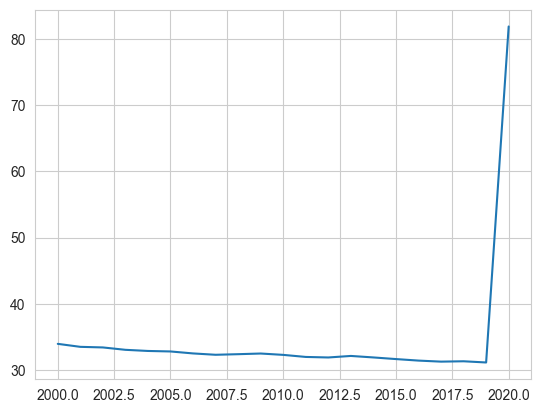

In [87]:
#It can be seen the overall trend is to decrease until 2019, 
dates = energy_data['year'].unique()
renewal_energy = energy_data[['year','renewable_energy(%)']].groupby(by='year').mean()
# Create a line plot
plt.plot(dates, renewal_energy)
# Show the plot
plt.show()

In [88]:
x_unseen_china = energy_data[['country','year','access_electricity(%)','gdp_per_capita','electricity_from_renewals','electricity_fossil_fuels(twh)']][(energy_data['year']>= 2016) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]

In [89]:
y_unseen_china = energy_data[['primary_energy_consumption(kwh/person)']][(energy_data['year']>= 2016) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]

In [90]:
y_unseen_china.reset_index(inplace=True)
y_unseen_china.drop(['index'],axis=1, inplace=True)
y_energy= y_unseen_china

In [91]:
x_unseen_china.loc[777,'country'] = 'China'
x_unseen_china.loc[778,'country'] = 'China'
x_unseen_china.loc[779,'country'] = 'China'
x_unseen_china.loc[780,'country'] = 'China'
x_unseen_china.loc[781,'country'] = 'China'

x_unseen_china.loc[777,'year'] = '2021'
x_unseen_china.loc[778,'year'] = '2022'
x_unseen_china.loc[779,'year'] = '2023'
x_unseen_china.loc[780,'year'] = '2024'
x_unseen_china.loc[781,'year'] = '2025'

In [92]:
x_unseen_china.reset_index(inplace=True)
x_unseen_china.drop(['index'],axis=1, inplace=True)

In [93]:
x_unseen_china

,country,year,access_electricity(%),gdp_per_capita,electricity_from_renewals,electricity_fossil_fuels(twh)
0,China,2016.0,100.0,8094.363367,1522.79,4355.00
1,China,2017.0,100.0,8816.986905,1667.06,4643.10
2,China,2018.0,100.0,9905.342004,1835.32,4990.28
3,China,2019.0,100.0,10143.838170,2014.57,5098.22
4,China,2020.0,100.0,10434.775190,2184.94,5184.13
5,China,2021,NaN,NaN,NaN,NaN
6,China,2022,NaN,NaN,NaN,NaN
7,China,2023,NaN,NaN,NaN,NaN
8,China,2024,NaN,NaN,NaN,NaN
9,China,2025,NaN,NaN,NaN,NaN


In [94]:
#Access to Electricity
x_unseen_china['access_electricity(%)'] = x_unseen_china['access_electricity(%)'].fillna(x_unseen_china['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_per_capita
x_unseen_china['gdp_per_capita'] = x_unseen_china['gdp_per_capita'].fillna(x_unseen_china['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_china['electricity_from_renewals'] = x_unseen_china['electricity_from_renewals'].fillna(x_unseen_china['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
x_unseen_china['electricity_fossil_fuels(twh)'] = x_unseen_china['electricity_fossil_fuels(twh)'].fillna(x_unseen_china['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
x_unseen_china

,country,year,access_electricity(%),gdp_per_capita,electricity_from_renewals,electricity_fossil_fuels(twh)
0,China,2016.0,100.0,8094.363367,1522.79,4355.00
1,China,2017.0,100.0,8816.986905,1667.06,4643.10
2,China,2018.0,100.0,9905.342004,1835.32,4990.28
3,China,2019.0,100.0,10143.838170,2014.57,5098.22
4,China,2020.0,100.0,10434.775190,2184.94,5184.13
5,China,2021,100.0,10725.712210,2355.31,5270.04
6,China,2022,100.0,11016.649230,2525.68,5355.95
7,China,2023,100.0,11307.586250,2696.05,5441.86
8,China,2024,100.0,11598.523270,2866.42,5527.77
9,China,2025,100.0,11889.460290,3036.79,5613.68


In [95]:
enc = preprocessing.OrdinalEncoder()
X = x_unseen_china[['country']]
enc.fit(X)
x_unseen_china['country'] = enc.transform(x_unseen_china[['country']])

In [96]:
x_unseen_china_future_years = x_unseen_china.iloc[5:]

In [97]:
x_unseen_china_future_years

,country,year,access_electricity(%),gdp_per_capita,electricity_from_renewals,electricity_fossil_fuels(twh)
5,0.0,2021,100.0,10725.71221,2355.31,5270.04
6,0.0,2022,100.0,11016.64923,2525.68,5355.95
7,0.0,2023,100.0,11307.58625,2696.05,5441.86
8,0.0,2024,100.0,11598.52327,2866.42,5527.77
9,0.0,2025,100.0,11889.46029,3036.79,5613.68


In [98]:
scaler = StandardScaler()
x_train_scaled_unseen = scaler.fit_transform(x_unseen_china_future_years)

# Create unseen data from 2021 to 2026 

In [99]:
#We use the extrapolating method to fill the 2020 years
for country in energy_data['country'].unique():
       energy_data['renewable_energy(%)'][energy_data['country']==country] = energy_data['renewable_energy(%)'][energy_data['country']==country].fillna(energy_data['renewable_energy(%)'][energy_data['country']==country].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

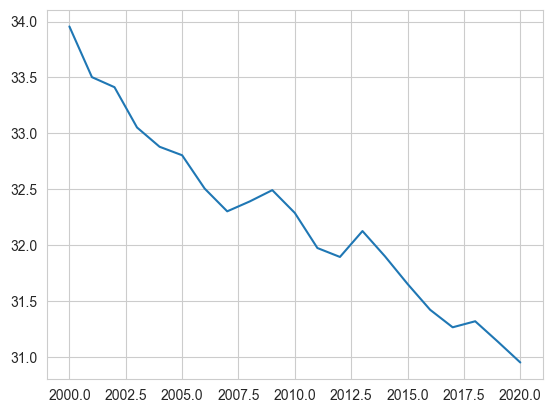

In [100]:
#It can be seen the overall trend is to decrease until 2019, 
dates = energy_data['year'].unique()
renewal_energy = energy_data[['year','renewable_energy(%)']].groupby(by='year').mean()
# Create a line plot
plt.plot(dates, renewal_energy)
# Show the plot
plt.show()

In [101]:
energy_data

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
0,Montenegro,2000,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,Montenegro,2001,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,Montenegro,2002,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,Montenegro,2003,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,Montenegro,2004,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3650,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3651,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3652,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


In [102]:
energy_data['electricity_fossil_fuels(twh)'].fillna(method='bfill', inplace = True)
energy_data['electricity_from_renewals'].fillna(method='bfill', inplace = True)
energy_data['electricity_low_carbon(%)'].fillna(method='bfill', inplace = True)
energy_data['primary_energy_consumption(kwh/person)'].fillna(method='bfill', inplace = True)
energy_data['primary_energy_intensity'].fillna(method='bfill', inplace = True)
energy_data['electricity_nuclear'].fillna(method='bfill', inplace = True)
energy_data['co2_emissions'].fillna(method='bfill', inplace = True)
energy_data['gdp_per_capita'].fillna(method='bfill', inplace = True)
energy_data['gdp_growth'].fillna(method='bfill', inplace = True)
energy_data['land_area'].fillna(method='bfill', inplace = True)

In [103]:
energy_data[energy_data['co2_emissions'].isnull() == True]['co2_emissions'] = 0

In [104]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 3654 non-null   object 
 1   year                                    3654 non-null   int64  
 2   access_electricity(%)                   3654 non-null   float64
 3   access_cleaning_flues_cooking           3654 non-null   float64
 4   renewable_energy(%)                     3654 non-null   float64
 5   electricity_fossil_fuels(twh)           3654 non-null   float64
 6   electricity_nuclear                     3654 non-null   float64
 7   electricity_from_renewals               3654 non-null   float64
 8   electricity_low_carbon(%)               3654 non-null   float64
 9   primary_energy_consumption(kwh/person)  3654 non-null   float64
 10  primary_energy_intensity                3654 non-null   floa

## 6. Model

## Encoding Dataset

In [105]:
original_df = energy_data

In [106]:
enc = preprocessing.OrdinalEncoder()
X = energy_data[['country']]
enc.fit(X)
energy_data['country'] = enc.transform(energy_data[['country']])
energy_data.head(25)

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
0,104.0,2000,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
1,104.0,2001,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2,104.0,2002,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
3,104.0,2003,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
4,104.0,2004,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
5,104.0,2005,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
6,104.0,2006,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
7,104.0,2007,100.0,64.80,42.27,0.86,0.0,1.28,59.813080,21851.393,4.71,2099.999905,6.810150,5976.394145,47.0,13812.0,42.708678,19.37439
8,104.0,2008,100.0,64.20,38.76,1.29,0.0,1.54,54.416960,24712.115,4.73,2690.000057,7.222753,7367.751909,47.0,13812.0,42.708678,19.37439
9,104.0,2009,100.0,63.30,49.16,0.69,0.0,2.07,75.000000,21325.205,3.98,1750.000000,-5.795097,6727.107767,47.0,13812.0,42.708678,19.37439


## Separating Target from Features

In [107]:
target = 'primary_energy_consumption(kwh/person)'
features = ['country','year','access_electricity(%)','gdp_per_capita','electricity_from_renewals','electricity_fossil_fuels(twh)']
x_imputed = energy_data[features]
y = energy_data[target]

## Feature Selection

## Splitting dataset

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size = 0.4, random_state = 42)

In [109]:
x_train

,country,year,access_electricity(%),gdp_per_capita,electricity_from_renewals,electricity_fossil_fuels(twh)
1286,59.0,2005,30.456268,749.908535,0.00,0.19
349,14.0,2013,100.000000,16451.279310,0.00,0.95
1368,63.0,2003,100.000000,18477.578360,5.89,52.01
3537,168.0,2009,99.100000,9451.932449,6.08,2.72
643,28.0,2013,56.207813,1527.751257,4.33,1.82
...,...,...,...,...,...,...
1130,51.0,2017,48.472744,4070.609024,0.01,0.40
1294,59.0,2013,51.500000,749.908535,0.00,0.25
860,38.0,2020,99.900000,12140.854150,11.55,0.19
3507,167.0,2000,100.000000,36334.908780,350.93,2697.28


In [110]:
energy_data

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
0,104.0,2000,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,104.0,2001,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,104.0,2002,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,104.0,2003,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,104.0,2004,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,173.0,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3650,173.0,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3651,173.0,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3652,173.0,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


In [111]:
i=0
j=0
k=0

x_test_country = pd.DataFrame(0, index=np.arange(880), columns=['renewable_energy(%)']) 
x_train_country = pd.DataFrame(0, index=np.arange(2816), columns=['renewable_energy(%)']) 
y_test_country = energy_data['co2_emissions']
y_train_country = energy_data['co2_emissions']

for country in energy_data['country'].unique():
       #Train Dataset three years and skip by country, including last 3 years
       x_train_country.iloc[i] = energy_data['renewable_energy(%)'].iloc[j]
       x_train_country.iloc[i+1] = energy_data['renewable_energy(%)'].iloc[j+2]
       x_train_country.iloc[i+2] = energy_data['renewable_energy(%)'].iloc[j+3]
       x_train_country.iloc[i+3] = energy_data['renewable_energy(%)'].iloc[j+4]
       x_train_country.iloc[i+4] = energy_data['renewable_energy(%)'].iloc[j+6]
       x_train_country.iloc[i+5] = energy_data['renewable_energy(%)'].iloc[j+7]
       x_train_country.iloc[i+6] = energy_data['renewable_energy(%)'].iloc[j+8]
       x_train_country.iloc[i+7] = energy_data['renewable_energy(%)'].iloc[j+10]
       x_train_country.iloc[i+8] = energy_data['renewable_energy(%)'].iloc[j+11]
       x_train_country.iloc[i+9] = energy_data['renewable_energy(%)'].iloc[j+12]
       x_train_country.iloc[i+10] = energy_data['renewable_energy(%)'].iloc[j+14]
       x_train_country.iloc[i+11] = energy_data['renewable_energy(%)'].iloc[j+15]
       x_train_country.iloc[i+12] = energy_data['renewable_energy(%)'].iloc[j+16]
       x_train_country.iloc[i+13] = energy_data['renewable_energy(%)'].iloc[j+18]
       x_train_country.iloc[i+14] = energy_data['renewable_energy(%)'].iloc[j+19]
       x_train_country.iloc[i+15] = energy_data['renewable_energy(%)'].iloc[j+20]
       #Test Dataset three years and skip by country, including last 3 years
       x_test_country.iloc[k] = energy_data['renewable_energy(%)'].iloc[j+1]
       x_test_country.iloc[k+1] = energy_data['renewable_energy(%)'].iloc[j+5]
       x_test_country.iloc[k+2] = energy_data['renewable_energy(%)'].iloc[j+9]
       x_test_country.iloc[k+3] = energy_data['renewable_energy(%)'].iloc[j+13]
       x_test_country.iloc[k+4] = energy_data['renewable_energy(%)'].iloc[j+17]
       i=i+16
       j=j+21
       k=k+5   

In [112]:
x_train_country

,renewable_energy(%)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2811,0.0
2812,0.0
2813,0.0
2814,0.0


## Normalization

In [113]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Hyperparameter Optimization

#### Random Forest

In [114]:
#rf_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2]}
rf_model = RandomForestRegressor(random_state=2)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(x_train_scaled, y_train)
best_rf_params = rf_grid_search.best_params_

### Gradient Boosting


In [115]:
#gb_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
gb_param_grid = {'n_estimators': [100], 'max_depth': [3], 'learning_rate': [0.01]}
gb_model = GradientBoostingRegressor(random_state=2)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(x_train_scaled, y_train)
best_gb_params = gb_grid_search.best_params_


### Initialization the models

In [116]:
random_forest_model = RandomForestRegressor(**best_rf_params, random_state=2)
gradient_boosting_model = GradientBoostingRegressor(**best_gb_params, random_state=2)
linear_regression_model = LinearRegression()

### Training

In [117]:
random_forest_model.fit(x_train_scaled, y_train)
gradient_boosting_model.fit(x_train_scaled, y_train)
linear_regression_model.fit(x_train_scaled, y_train)

LinearRegression()

### Predictions

In [118]:
rforest_predictions = random_forest_model.predict(x_test_scaled)
linreg_predictions = linear_regression_model.predict(x_test_scaled)
gradboost_predictions = gradient_boosting_model.predict(x_test_scaled)

In [119]:
rforest_predictions

array([16310.36472 , 47218.19973 , 64870.2578  , ..., 10891.559182,
       11386.154988, 38078.47838 ])

In [120]:
rf_mse = mean_squared_error(y_test, rforest_predictions)
lr_mse = mean_squared_error(y_test, linreg_predictions)
gb_mse = mean_squared_error(y_test, gradboost_predictions)

In [121]:
rf_r2 = r2_score(y_test, rforest_predictions)
lr_r2 = r2_score(y_test, linreg_predictions)
gb_r2 = r2_score(y_test, gradboost_predictions)

In [122]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'MSE': [rf_mse, lr_mse, gb_mse],
    'R-squared': [rf_r2, lr_r2, gb_r2]
})

In [123]:
results

,Model,MSE,R-squared
0,Random Forest,4.829061e+07,0.956688
1,Linear Regression,5.494747e+08,0.507170
2,Gradient Boosting,3.676515e+08,0.670250


In [124]:
from sklearn.feature_selection import SelectKBest, f_regression
importances = random_forest_model.feature_importances_
feature_names = x_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_n = 5  # Set the number of top features to display
top_feature_names, top_importances = zip(*sorted_feature_importance[:top_n])

fig = px.bar(
    x=top_importances,
    y=top_feature_names,
    orientation='h',
    title='Top 5 Feature Importance',
    labels={'x': 'Importance', 'y': 'Feature'},
    color=top_importances,  # Color bars by importance values
    color_continuous_scale='reds',  # Choose a color scale
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

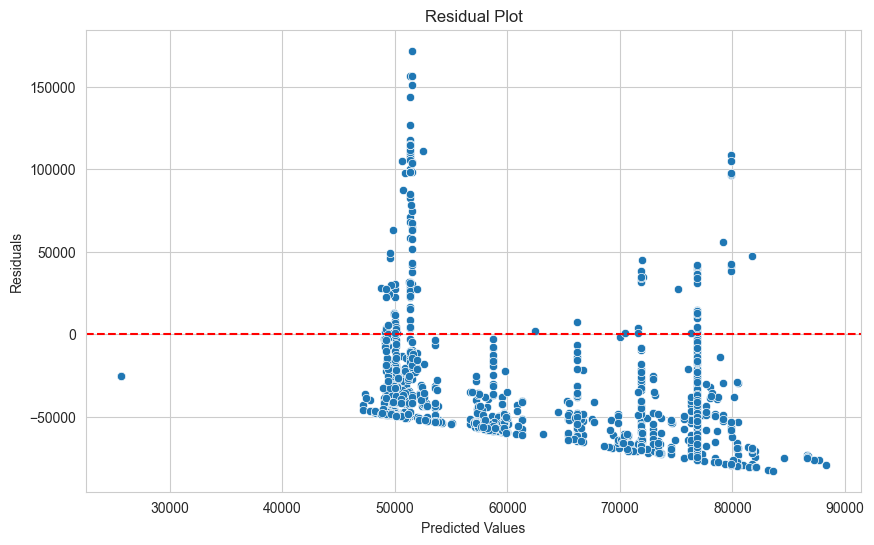

In [125]:
y_pred= random_forest_model.predict(x_test)

# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#Forward_selection   

In [126]:
#X = features
#y = target
#df= energy_data

#def forward_selection(df, target, significance_level=0.05):
#    initial_features = df.columns.tolist()
#    best_features = []
#    while len(initial_features) > 0:
#        remaining_features = list(set(initial_features) - set(best_features))
#        new_pval = pd.Series(index=remaining_features)
#        for new_column in remaining_features:
#            model = sm.OLS(target, sm.add_constant(df[best_features + [new_column]])).fit()
#            new_pval[new_column] = model.pvalues[new_column]
#        min_p_value = new_pval.min()
#        if min_p_value < significance_level:
#            best_features.append(new_pval.idxmin())
##        else:
#            break
#    return best_features

# Assuming you have already defined X and y as the features and target variable respectively
#selected_features = forward_selection(X, y)
#print("Selected features:", selected_features)

In [127]:
energy_data

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
0,104.0,2000,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,104.0,2001,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,104.0,2002,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,104.0,2003,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,104.0,2004,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,173.0,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3650,173.0,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3651,173.0,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3652,173.0,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


### 11. Conclusion / Answer Question

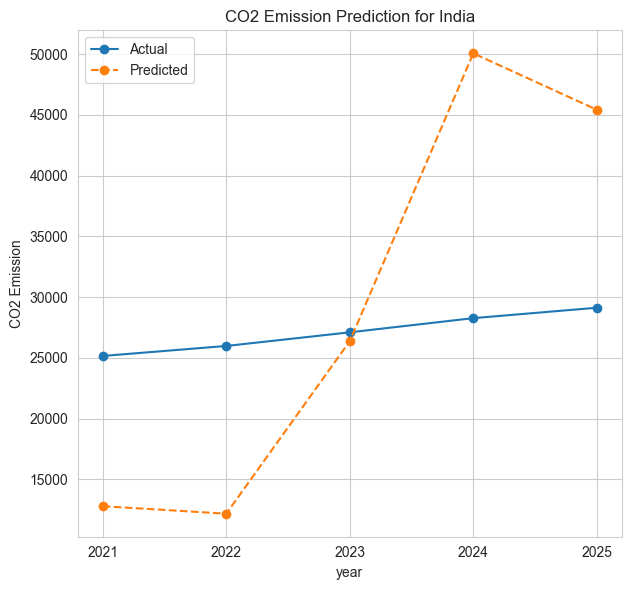

In [131]:
import matplotlib.pyplot as plt
# Predict CO2 emission and energy consumption for the years 2021 to 2025
x_unseen_china['year'] = pd.to_numeric(x_unseen_china['year'])
x_unseen_china['year'] = x_unseen_china['year'][(x_unseen_china['year'] < 2021) & (x_unseen_china['year'] >=2016)]
                             
predicted_co2 = random_forest_model.predict(x_train_scaled_unseen)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_unseen_china_future_years['year'], y_energy, label='Actual', marker='o')
plt.plot(x_unseen_china_future_years['year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for India')
plt.xlabel('year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predicted_co2 = random_forest_model.predict(x_train_scaled_unseen)
predicted_co2

In [ ]:
y_energy

In [ ]:
x_unseen_china['year']

In [ ]:
x_unseen_china_future_years['year']

In [ ]:
original_df